In [1]:
library(tidyverse)
library(RColorBrewer)
library(DESeq2)
library(pheatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [2]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/PCA_all_species')

In [3]:
## Loading data
data <- read.table("DESeq2_count_matrix_all_species.csv", sep=",",header = T,row.names=1)
meta <- read.csv("DESeq2_sample_annotation_all_species.tsv", sep = "\t", row.names="sample")
## first column is row names: row.names = 1

In [4]:
head(data)

,Tdu_1,Tdu_2,Tdu_3,Tdu_4,Tdu_5,Tdu_6,Tpr_1,Tpr_2,Tpr_3,Tml_1,Tml_2,Tml_3,Tms_1,Tms_2,Tms_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,92,109,123,106,116,121,103,173,78,71,58,79,63,65,63
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,157,218,281,177,169,238,204,402,205,135,137,111,130,154,195
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,36,64,58,43,36,47,21,25,18,26,20,9,11,30,21
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,96,140,142,80,126,108,141,200,119,71,38,47,32,43,76
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,773,1099,976,809,1113,918,751,1281,700,437,337,388,362,405,497
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,50,46,72,28,48,39,35,118,55,7,49,58,84,40,93


In [5]:
## match the metadata and counts data
all(colnames(data) %in% rownames(meta))

[1] TRUE

In [6]:
## Creat DESeq2Dataset object
dds <- DESeqDataSetFromMatrix(countData = data, colData = meta, design = ~ species)
## generate size factors
## By assigning the results back to the dds object we are filling in the slots of the DESeqDataSet object with the appropriate info
dds <- estimateSizeFactors(dds)

In [7]:
head(counts(dds, normalized=TRUE))

,Tdu_1,Tdu_2,Tdu_3,Tdu_4,Tdu_5,Tdu_6,Tpr_1,Tpr_2,Tpr_3,Tml_1,Tml_2,Tml_3,Tms_1,Tms_2,Tms_3
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1,73.76038,70.74995,69.23723,95.93119,78.71779,98.93339,104.75295,94.90062,85.96515,139.07835,86.41618,117.40179,83.86252,95.94044,58.88220
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5,125.87369,141.49991,158.17612,160.18700,114.68367,194.59625,207.47187,220.52052,225.93405,264.44475,204.12097,164.95695,173.04964,227.30505,182.25443
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1,28.86276,41.54126,32.64845,38.91548,24.42966,38.42867,21.35740,13.71396,19.83811,50.93010,29.79868,13.37489,14.64266,44.28020,19.62740
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1,76.96735,90.87150,79.93242,72.40090,85.50380,88.30418,143.39967,109.71170,131.15196,139.07835,56.61750,69.84664,42.59684,63.46829,71.03250
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3,619.74752,713.34127,549.39464,732.15412,755.28359,750.58553,763.78124,702.70345,771.48212,856.01745,502.10779,576.60627,481.87670,597.78276,464.51513
Tpr_TRINITY_DN12798_c2_g2|Tdu_TRINITY_DN24179_c2_g3,40.08716,29.85778,40.52911,25.34032,32.57288,31.88762,35.59566,64.72990,60.61645,13.71195,73.00677,86.19372,111.81669,59.04027,86.92134


### Quality control

In [8]:
## Transform normalized counts using the rlog transformation
## The rlog transformation of the normalized counts is only necessary for these visualization methods during this quality assessment
## The blind=TRUE argument results in a transformation unbiased to sample condition information
rld <- rlog(dds, blind=TRUE)

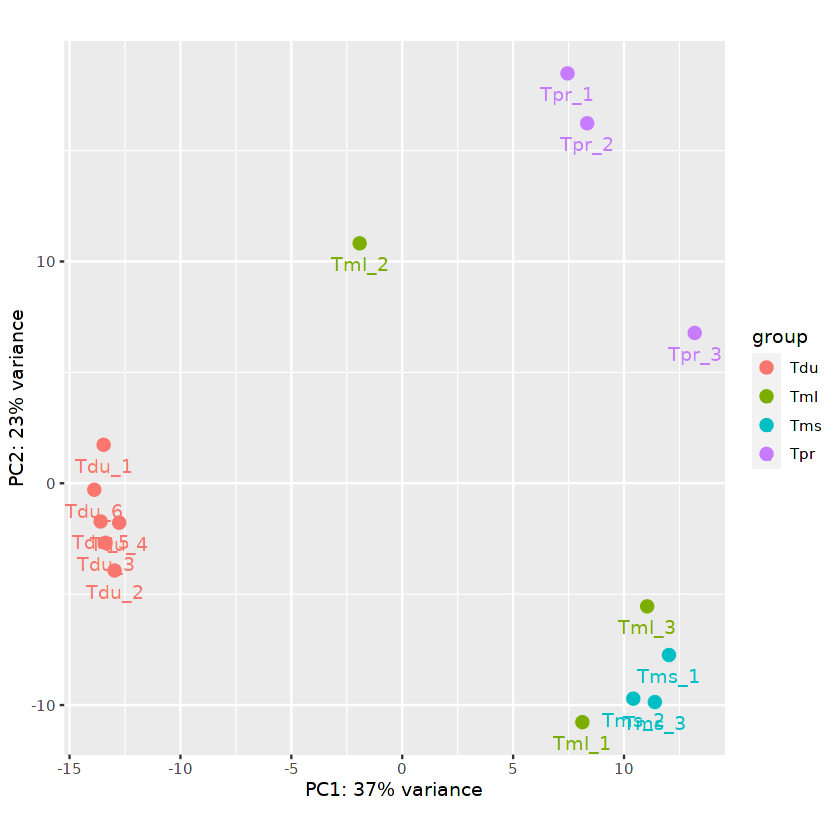

In [9]:
## Plot PCA
plotPCA(rld, intgroup="species") + geom_text(aes(label=name),vjust=2)

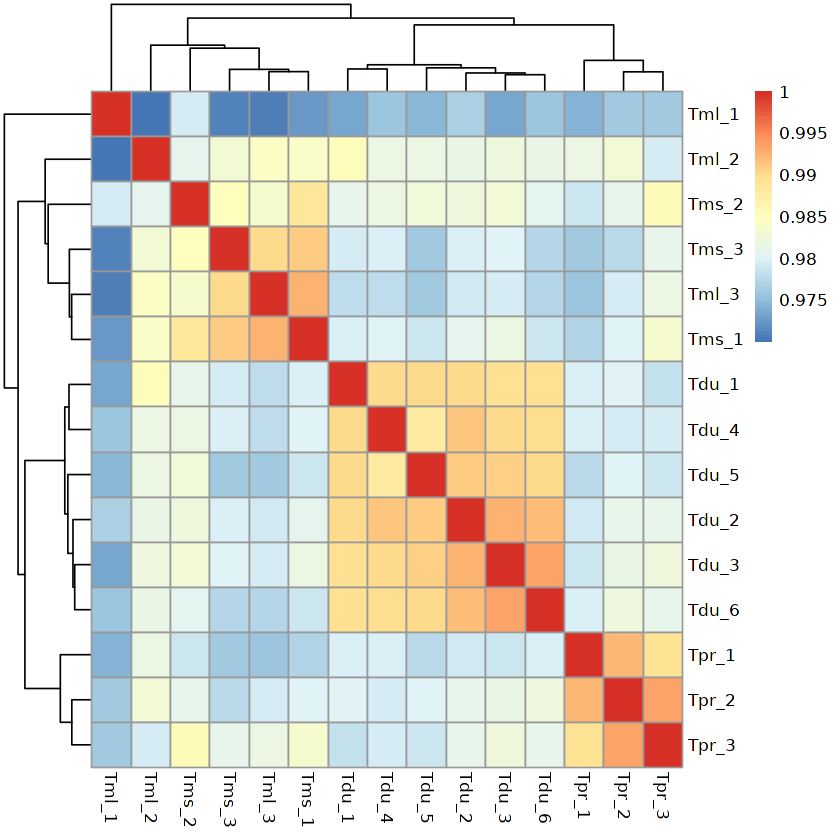

In [10]:
## Hierarchical clustering
## Extract the rlog matrix from the object
rld_mat <- assay(rld)
## Compute pairwise correlation values
rld_cor <- cor(rld_mat)
## Plot heatmap
pheatmap(rld_cor)